In [1]:
import pandas as pd

games_df = pd.read_csv("../data/processed/data.csv")
games_df

,win_name,lose_name,win_color,lose_color,date,win_rank,lose_rank,komi
0,Lin Lixiang,Lin Xiuping,b,w,2020-01-14,7p,6p,6.5
1,Jian Jingting,Hei Jiajia,b,w,2018-03-19,3p,7p,6.5
2,Toyoda Hirohito,Aoki Hirotaka,b,w,2021-09-27,1p,2p,6.5
3,Shimamura Toshihiro,Hashimoto Utaro,w,b,1963-01-16,9p,9p,4.5
4,Oh Yujin,Zhao Yifei,w,b,2018-08-14,6p,3p,7.5
...,...,...,...,...,...,...,...,...
101404,Gao Xing,Gu Wanshan,w,b,2021-09-27,4p,2p,7.5
101405,Kang Dongyun,Lin Junyan,b,w,2012-12-12,9p,3p,7.5
101406,Shin Jinseo,Park Junghwan,b,w,2020-10-22,9p,9p,6.5
101407,Wang Yuhui,Chen Linxin,b,w,1999-11-11,6p,9p,5.5


In [2]:
games_df = games_df.sort_values(by=['date']).reset_index(drop=True)

In [3]:
from whr import whole_history_rating
from tqdm import tqdm
import datetime

whr = whole_history_rating.Base()
start_date = datetime.datetime(1941, 5, 18)
for idx, row in tqdm(games_df.iterrows()):
    date = datetime.datetime.strptime(row['date'], '%Y-%m-%d')
    delta = date - start_date
    if row['win_color'] == 'b':
        whr.create_game(row['win_name'], row['lose_name'], 'B', delta.days, 0)
    else:
        whr.create_game(row['lose_name'], row['win_name'], 'W', delta.days, 0)

whr.auto_iterate()

101409it [00:27, 3689.72it/s]


(20, False)

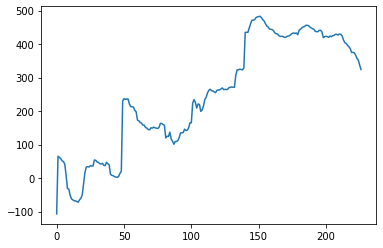

In [16]:
import matplotlib.pyplot as plt

ratings = whr.ratings_for_player("Lee Changseok")
lee_chang_seok_ratings = [rating for _, rating, _ in ratings]

plt.plot(lee_chang_seok_ratings)
plt.show()

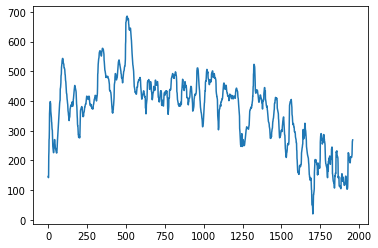

In [17]:
import matplotlib.pyplot as plt

ratings = whr.ratings_for_player("Lee Changho")
lee_chang_ho_ratings = [rating for _, rating, _ in ratings]

plt.plot(lee_chang_ho_ratings)
plt.show()

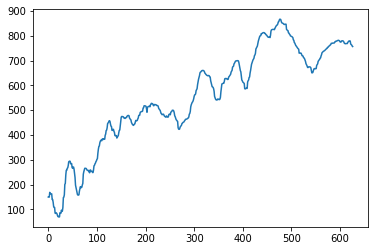

In [18]:
import matplotlib.pyplot as plt

ratings = whr.ratings_for_player("Shin Jinseo")
shin_jin_seo_ratings = [rating for _, rating, _ in ratings]

plt.plot(shin_jin_seo_ratings)
plt.show()

In [19]:
games_df.loc[games_df.win_name == 'Shin Jinseo']

,win_name,lose_name,win_color,lose_color,date,win_rank,lose_rank,komi
53398,Shin Jinseo,Lin Lixiang,b,w,2012-09-11,1p,5p,6.5
53430,Shin Jinseo,Yu Zhengqi,w,b,2012-09-12,1p,2p,6.5
54583,Shin Jinseo,Lee Changho,b,w,2013-01-11,1p,9p,6.5
54685,Shin Jinseo,Zhang Qiang,w,b,2013-01-20,1p,4p,7.5
54726,Shin Jinseo,Wang Tao,b,w,2013-01-23,1p,5p,7.5
...,...,...,...,...,...,...,...,...
101127,Shin Jinseo,Park Joonhoon,b,w,2022-01-20,9p,5p,6.5
101253,Shin Jinseo,Park Sangjin,w,b,2022-02-05,9p,6p,6.5
101267,Shin Jinseo,Yang Dingxin,w,b,2022-02-07,9p,9p,6.5
101272,Shin Jinseo,Yang Dingxin,b,w,2022-02-09,9p,9p,6.5


In [20]:
games_df.loc[games_df.lose_name == 'Shin Jinseo']

,win_name,lose_name,win_color,lose_color,date,win_rank,lose_rank,komi
53449,Xia Chenkun,Shin Jinseo,b,w,2012-09-13,2p,1p,6.5
54646,Yang Dingxin,Shin Jinseo,w,b,2013-01-17,3p,1p,7.5
54666,Li Qincheng,Shin Jinseo,w,b,2013-01-18,1p,1p,7.5
55018,Chen Hao,Shin Jinseo,w,b,2013-02-26,4p,1p,7.5
55672,Lee Jihyun (m),Shin Jinseo,w,b,2013-04-28,3p,1p,6.5
...,...,...,...,...,...,...,...,...
99861,Park Junghwan,Shin Jinseo,b,w,2021-11-02,9p,9p,6.5
99869,Park Junghwan,Shin Jinseo,w,b,2021-11-03,9p,9p,6.5
100429,Byun Sangil,Shin Jinseo,b,w,2021-12-12,9p,9p,6.5
100828,Lee Donghoon,Shin Jinseo,b,w,2022-01-07,9p,9p,6.5


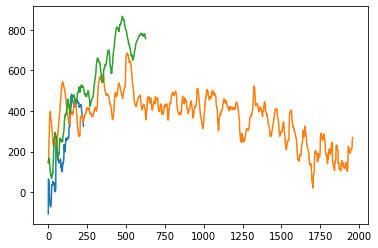

In [21]:
plt.plot(lee_chang_seok_ratings)
plt.plot(lee_chang_ho_ratings)
plt.plot(shin_jin_seo_ratings)
plt.show()